In [21]:
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np
from joblib import Parallel, delayed

# Suppress the specific warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Generate synthetic dataset
X, y = make_classification(
    n_samples=100000,      # Number of samples
    n_features=20,        # Number of features
    n_informative=5,      # Number of informative features
    n_classes=5,          # Number of classes
    n_clusters_per_class=1,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Non-Parallel KNN
knn = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = knn.predict(X_test)
prediction_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)

print(f"Non-Parallel KNN Accuracy: {accuracy:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")

# Parallel KNN
def parallel_predict(knn, X_test_chunk):
    return knn.predict(X_test_chunk)

n_jobs = 4  # Number of jobs to run in parallel
X_test_chunks = np.array_split(X_test, n_jobs)

start_time = time.time()
y_pred_chunks = Parallel(n_jobs=n_jobs)(delayed(parallel_predict)(knn, chunk) for chunk in X_test_chunks)
y_pred = np.concatenate(y_pred_chunks)
prediction_time_parallel = time.time() - start_time

accuracy_parallel = accuracy_score(y_test, y_pred)

print(f"Parallel KNN Accuracy: {accuracy_parallel:.4f}")
print(f"Prediction Time (Parallel): {prediction_time_parallel:.4f} seconds")

Non-Parallel KNN Accuracy: 0.8257
Training Time: 0.0040 seconds
Prediction Time: 15.7508 seconds
Parallel KNN Accuracy: 0.8257
Prediction Time (Parallel): 9.3204 seconds


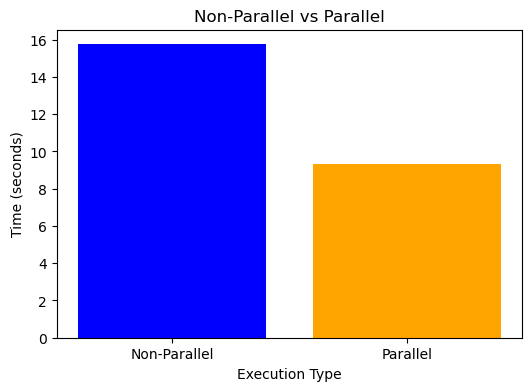

In [23]:
import matplotlib.pyplot as plt

# Given data
non_parallel_time = prediction_time  # seconds
parallel_time = prediction_time_parallel      # seconds

# Labels and values for the bar chart
labels = ['Non-Parallel', 'Parallel']
times = [non_parallel_time, parallel_time]

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(labels, times, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Execution Type')
plt.ylabel('Time (seconds)')
plt.title('Non-Parallel vs Parallel')

# Show the plot
plt.show()